# Week Four: Pandas and Scipy

To be graded, your notebook must be runnable start to finish. If you can't make an in-notebook test pass, comment it out for to attempt to get partial credit. You should replace the `...` markers with your code. Do not change the names of the pre-defined ALL_CAPS variables and functions. (If you start from scratch, make sure you match the requested function names and requested ALL_CAPS variables). Other that that, you are free to define or make anything you wish. Remember that functions will often be tested with different numbers than the ones you are given.

This notebook will also be graded for plots - please make sure you save the notebook with the plots present, just in case I have a problem running them. If you change to the notebook backend (or any other backend), I recommend changing back to inline and re-running before saving the file - some of the more interactive backends don't get captured in the saved file.

In [2]:
WVUID = 'sixplus2'
NAME = 'Joe Smith'

import pandas as pd
import numpy as np

In [ ]:
# import any library you need to solve the problems below

# Exploring the Periodic Table 

You have been given a datafile (in this directory) called PeriodicTableOfElements.csv. It contains all the elements in the periodic table and what we will like to know is to be able to explore the properties of the different elements.

Atomic Number,Element,Symbol,Atomic Weight,Period,Group,Phase,Most Stable Crystal,Type,Ionic Radius,Atomic Radius,Electronegativity,First Ionization Potential,Density,Melting Point (K),Boiling Point (K),Isotopes,Discoverer,Year of Discovery,Specific Heat Capacity,Electron Configuration,Display Row,Display Column

In [29]:
# Using pandas, read the datafile and store it

df=pd.read_csv("PeriodicTableOfElements.csv",encoding='cp1252')

In [ ]:
#find the average of the Atomic Weight of all the elements in the periodic table.

In [9]:
#find the average of the Atomic Weight of the periodic table with a electronegativity larger than 3.0
df1=df[df['Electronegativity']>3.0]
df1["Electronegativity"].mean()

3.4050000000000002

In [27]:
# write a a function that return a set of elements with specific properties which is provided by the
# user. 
# The user provides a dictionary as {"Boiling Point":[10,500],"Atomic Radius":[0.5,1.5]}
# The number of properties used to create the list of elements is not constrained and you need to check that
# the property requested by the used exist within the possible list of properties existing in the file
# As the value of the key in the dictionary, the user can provide (a) a single number 
# (b) an array with two elements, where the content of the array will be the minimum and the maximum value.
# In the case that the property has only string values, the user can only provide a single string.
# The function should be able to print a message if the user made a mistake with the expected format.

def analyzedict(mydict):
    columns=mydict.keys()
    output={}
    print(df.columns)
    for x in columns:
        if x in df.columns:
            if type(mydict[x]) == list:
                print(mydict[x][0])
                df1=df[x].between(mydict[x][0], mydict[x][1], inclusive='neither')
            else:
                df1=df[df[x]==mydict[x]]
            output[x]=df1
        else:
            print(x," is not one of the avaiable columns in the Periodic Table")
    return output
    
mydict={"Boiling Point":[10,500],"Atomic Radius":[0.5,1.5]}
out=analyzedict(mydict)

Index(['Atomic Number', 'Element', 'Symbol', 'Atomic Weight', 'Period',
       'Group', 'Phase', 'Most Stable Crystal', 'Type', 'Ionic Radius',
       'Atomic Radius', 'Electronegativity', 'First Ionization Potential',
       'Density', 'Melting Point (K)', 'Boiling Point (K)', 'Isotopes',
       'Discoverer', 'Year of Discovery', 'Specific Heat Capacity',
       'Electron Configuration', 'Display Row', 'Display Column'],
      dtype='object')
Boiling Point  is not one of the avaiable columns in the Periodic Table
0.5


<AxesSubplot:>

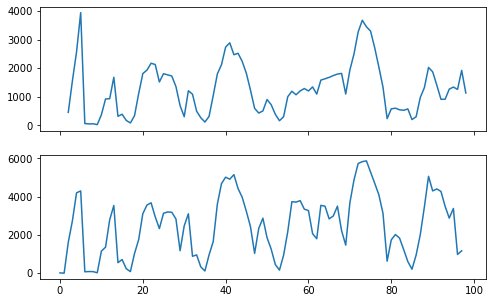

In [44]:
# Plot a histogram of the melting and the boiling point. Both plots need to share the same x-axis and the 
# value for the x should be the Atomic number

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 5), sharex=True)
df['Melting Point (K)'].plot(ax=axes[0])
df['Boiling Point (K)'].plot(ax=axes[1])

In [ ]:
# plot a histogram of all the different crystal type 
# (on the x-axis is the crystal and on the y-axis the number of elements with that particular crystal type)

# Solving simple algebraic equations with Scipy

In [82]:
# Using numpy, create a matrix where each of the values in the matrix is (i+1)*(j+1)
# i is the row position and j is the column position.
# the matrix should be of dimension 4x4 and you should use the lambda function for such. Call it M
ndim=4


m=np.fromfunction(lambda i, j: (i+1)*(j+1), shape=(ndim,ndim)).astype('int')

print(m)

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]


In [84]:
# Normalize the given matrix M so that all rows sum to 1.0.
p = m/np.sum(m, 1)[:, np.newaxis]
print(m)

[[0.1 0.1 0.1 0.1]
 [0.2 0.2 0.2 0.2]
 [0.3 0.3 0.3 0.3]
 [0.4 0.4 0.4 0.4]]


In [ ]:
# This new matrix then be considered as a transition matrix P for a Markov chain. 
# A markov chain is a process where a system in state i can jump to other states with a given probablity
# if the normalized matrix is called P, then the element P_ij is the 
# probability that the system being in state i can go to state j
# If the Markov chain is well defined, the probability needs to have a stationarity distribution
# it means that after some time, the probability of going from i to j is the same always independently
# of the number of steps you have repeated the process.


#In this problem you will find the stationary distribution of this matrix in differen ways 

In [86]:
# By raising the matrix P to some large power unitl it doesn’t change with higher powers 
# (see np.linalg.matrix_power), take the power to be 50 
# this means that you have multiplied PPPP....P  50 times
# now compute the 51 multiplication and use np.testing.assert_allclose to see if P50 is VERY close to P51

P50=np.linalg.matrix_power(p,50)
P51=np.linalg.matrix_power(p,51)
print(P50)
print(P51)
np.testing.assert_allclose(P50,P51)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [87]:
# Create a random vector of 4 components and normalize it to 1.0. Called V

v=np.random.rand(4)
v=v/np.sum(v)
print(v)

[0.13903274 0.36707609 0.04227945 0.45161172]


In [89]:
# compute the product between V and P51
# You will use the result here to compare with the results below.
np.dot(v,P50)

array([0.25, 0.25, 0.25, 0.25])

In [90]:
from scipy import linalg

In [92]:
# From the equation for stationarity wP=w, we can see that w must be a left eigenvector of P with 
# eigenvalue 1 (Note: np.linalg.eig returns the right eigenvectors, but the left eighenvector of a 
# matrix is the right eigenvector of the transposed matrix). Use this to find w using np.linalg.eig (normalized)
# compare with the previous calculation.

# 
lam, vec = linalg.eig(p, left=True, right=False)

idx = np.argmin(np.abs(lam - 1))
w = np.real(vec[:, idx])
w/w.sum()

array([0.25, 0.25, 0.25, 0.25])

In [96]:
# Using numpy.linalg with transpose to get the left eigenvectors

# Left eigenvector with eigenvalue 1
# note transpose of P to find left eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(p.T)
# find index of eigenvalue = 1
idx = np.argmin(np.abs(eigenvalues - 1))
w = np.real(eigenvectors[:, idx]).T
# remember to normalize eigenvector to get a probability distribution
w/np.sum(w)

array([0.25, 0.25, 0.25, 0.25])

In [97]:
# now let us use a different method
# in the previous statement we talk about w, as the solution to the problem wP=w
# now let use solve this problem by using a different methodology


a = p.T - np.eye(4)
a[3] = [1,1,1,1]
np.linalg.solve(a, [0,0,0,1])

array([0.25, 0.25, 0.25, 0.25])

$$
\begin{align}
  w_1 P_{11} + w_2 P_{21} + w_3 P_{31} + w_4 P_{41} &= w_1 \\
  w_1 P_{12} + w_2 P_{22} + w_3 P_{32} + w_4 P_{42}&= w_2 \\
  w_1 P_{13} + w_2 P_{23} + w_3 P_{33} + w_4 P_{43} &= w_3 \\
  w_1 P_{13} + w_2 P_{23} + w_3 P_{33} + w_4 P_{44} &= w_4
\end{align}
$$


This is a singular system (check it if you do not believe me), but we also know that
$w_1+w_2+w_3+w_4=1$ Use these facts to set up a linear system of equations that can be solved with np.linalg.solve to find w.

HINT: you can drop the last equation from the series of four and replace it by the condition that the sum is equal to one. 

In [ ]:
# As a check you should get the same W independently of the method. Math is marvelous!
